In [25]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from sklearn.utils import shuffle
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import seaborn as sns
from nltk.util import ngrams
import re, string, unicodedata

plt.style.use('ggplot')

In [26]:
sentiment = SentimentIntensityAnalyzer()

In [27]:
data = pd.read_csv('D:\Shree\Sentiment\product.csv', sep = ',', quotechar = '"', encoding = 'utf8',dtype={'Reviews':str,'BrandName':str},
    usecols=['Reviews','BrandName'],nrows=20000,na_values=[' ','.', '??']       # Take any '.' or '??' values as NA
)
data.columns = [col.replace(' ', '_').lower() for col in data.columns]
data.head(100)

,brandname,reviews
0,Samsung,I feel so LUCKY to have found this used (phone...
1,Samsung,"nice phone, nice up grade from my pantach revu..."
2,Samsung,Very pleased
3,Samsung,It works good but it goes slow sometimes but i...
4,Samsung,Great phone to replace my lost phone. The only...
...,...,...
95,Nokia,very well
96,Nokia,Cannot connect to GSM network
97,Nokia,"This cell phone exceeded my expectations, it's..."
98,Nokia,"pros.. it works fine, its easy to use, not too..."


In [28]:
processing_data1=[]
for d in data['reviews']:
    processing_data1.append(TextBlob(str(d).replace('[^\w\s]','').replace(",", "").replace(".", "").replace("!", "").replace("?", "")      .replace(";", "").replace(":", "")
                                .replace("*", "").replace("(", "").replace(")", "").replace("/", "").lower()).split(" "))

In [29]:
stop_words1=set(stopwords.words('english'))
stop_words1.add('I')
stop_words1.add('(')
stop_words1.add(')')
stop_words1.add(',')
rem=["won't","aren't","don't",'hadn''mightn','didn',"hadn't",'shouldn','no',"couldn't","doesn't",'nor', 'hasn',"shouldn't",'mustn','wasn','than',
     "shan't",'don','aren',"wasn't",'not','against', 'haven',"needn't","isn't",'weren',"wouldn't","weren't","you're", "mightn't","didn't","haven't","hasn't","mustn't"]

stop_words=[]
for w in stop_words1:
    if w not in rem:
        stop_words.append(w)

lemmatizer = WordNetLemmatizer()
processing_data2=[]
for a in processing_data1:
  temp=[]
  for b in a:
      if b not in stop_words:
       temp.append(lemmatizer.lemmatize(b,pos='a'))
  processing_data2.append(temp)

In [30]:
processing_data_response=[]
processing_data3=[]
all_words=[]
aaaa=0
for d in processing_data2:
    sum=0
    for a in d:
        ppp=float(TextBlob(a).sentiment[0])
        sum += ppp

    processing_data_response.append(sum)
    processing_data3.append([d, processing_data_response[aaaa]])
    aaaa+=1

In [31]:
kd=pd.DataFrame({'Reviews':data['reviews'],'Sentiment_score':processing_data_response})
kd.to_csv('D:\Shree\Sentiment\Sentiment_score.csv', sep=',', encoding='utf-8', index=False, header=True,columns=['ID','Unique ID','Reviews','Sentiment_score'])
print(kd.head(20))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


                                              Reviews  Sentiment_score
0   I feel so LUCKY to have found this used (phone...         1.101667
1   nice phone, nice up grade from my pantach revu...         3.933333
2                                        Very pleased         0.500000
3   It works good but it goes slow sometimes but i...         1.600000
4   Great phone to replace my lost phone. The only...         0.800000
5   I already had a phone with problems... I know ...        -0.600000
6   The charging port was loose. I got that solder...        -0.240559
7   Phone looks good but wouldn't stay charged, ha...         0.836364
8   I originally was using the Samsung S2 Galaxy f...         3.888149
9   It's battery life is great. It's very responsi...         1.133333
10  My fiance had this phone previously, but cause...         1.133333
11  This is a great product it came after two days...         0.912500
12  These guys are the best! I had a little situat...         1.745833
13  I'

In [32]:
np.random.shuffle(processing_data3)
training_data=processing_data3[:15000]
testing_data=processing_data3[15000:]
classes=[1,0]
print("size of the training data set is: ",len(training_data))
print("size of the testing data set is: ",len(testing_data))
positive_words={}
negative_words={}

size of the training data set is:  15000
size of the testing data set is:  5000


In [33]:
def print_sentiment_scores(sentence):
    snt = sentiment.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [34]:
print('polarity score-compound: ', sentiment.polarity_scores('It was a good experience :)')['compound'])

polarity score-compound:  0.7096


In [35]:
data['polarity_score'] = data['reviews'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])

In [36]:
data[['reviews','polarity_score']][0:5]

,reviews,polarity_score
0,I feel so LUCKY to have found this used (phone...,0.8783
1,"nice phone, nice up grade from my pantach revu...",0.9231
2,Very pleased,0.4927
3,It works good but it goes slow sometimes but i...,0.9185
4,Great phone to replace my lost phone. The only...,0.2942


In [37]:
data['sentiment']=''
data['polarity']=''

In [38]:
data.loc[(data.polarity_score<=1) & (data.polarity_score>=0.5),'sentiment']='V.Positive'
data.loc[(data.polarity_score<0.5) & (data.polarity_score>0),'sentiment']='Positive'
data.loc[(data.polarity_score==0),'sentiment']='Neutral'
data.loc[(data.polarity_score<0) & (data.polarity_score>=-0.5),'sentiment']='Negative'
data.loc[(data.polarity_score<-0.5) & (data.polarity_score>=-1),'sentiment']='V.Negative'

In [39]:
data.loc[(data.polarity_score<=1) & (data.polarity_score>0),'polarity']='positive'
data.loc[(data.polarity_score==0),'polarity']='neutral'
data.loc[(data.polarity_score<0) & (data.polarity_score>=-1),'polarity']='negative'

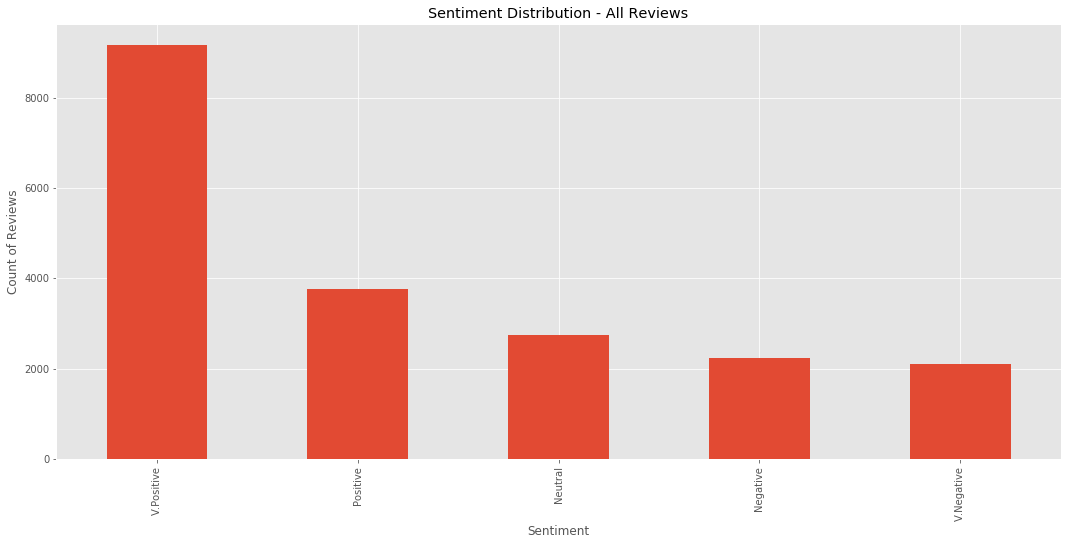

In [40]:
%matplotlib inline
plt.figure(figsize=(18,8))
plt.xlabel("Sentiment")
plt.ylabel("Count of Reviews")
data.sentiment.value_counts().plot(kind='bar', title="Sentiment Distribution - All Reviews")

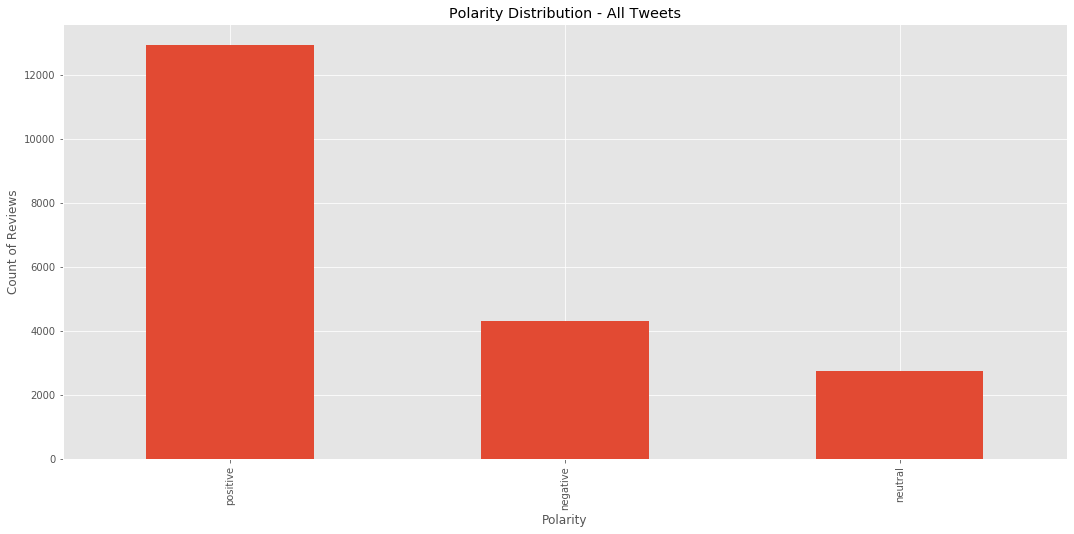

In [41]:
plt.figure(figsize=(18,8))
plt.xlabel("Polarity")
plt.ylabel("Count of Reviews")
data.polarity.value_counts().plot(kind='bar', title="Polarity Distribution - All Tweets")

In [19]:
def train_naive_bayes(training, classes):
    all_data = [[]] * len(classes)

    no_doc = [None] * len(classes)

    log_prior_prob = [None] * len(classes)

    loglikelihood = [None] * len(classes)
    for obs in training:  
        if obs[1] >=0:
           all_data[1] = all_data[1] + [obs] 
        else :
            all_data = all_data + [obs]
    vocabulary= []
    for dd in training:
        if dd[1]>=0:
           for word in dd[0]:
               if word not in vocabulary:
                   vocabulary.append(word)
               if positive_words.get(word)is not None:
                   positive_words[word]=positive_words[word]+1
               else:
                    positive_words[word]=1
        else:
            for word in dd[0]:
                if word not in vocabulary:
                    vocabulary.append(word)
                if negative_words.get(word)is not None:
                   negative_words[word] += 1
                else:
                    negative_words[word]=1

    vocabulary_size = len(vocabulary)
    total = len(training)
    for index in range(len(classes)):
        no_doc[index] = len(all_data[index])

        log_prior_prob[index] = np.log((no_doc[index] + 1) / total)

        count_w_in_vocabulary = 0
        for d in all_data[index]:
            count_w_in_vocabulary = count_w_in_vocabulary + len(d[0])
        denom = count_w_in_vocabulary + vocabulary_size

        dict = {}
        for wi in vocabulary:
            count_wi_in_all_data = 0
            for d in all_data[index]:
                for word in d[0]:
                    if word == wi:
                        count_wi_in_all_data = count_wi_in_all_data + 1
            numer = count_wi_in_all_data + 1
            dict[wi] = np.log((numer) / (denom))
        loglikelihood[index] = dict

    return (vocabulary, log_prior_prob, loglikelihood)

p,q,r=train_naive_bayes(training_data,classes)

def test_naive_bayes(test_docs, log_prior, log_likeli_hood, vocabulary):
  count = 0

  for ddd in test_docs:
    log_post_prob = [None] * len(classes)
    for index in classes:
        sumloglikelihoods = 0
        for word in ddd:
            if word in vocabulary:
                sumloglikelihoods += log_likeli_hood[index][word]

        log_post_prob[index] = log_prior[index] + sumloglikelihoods

    pp = 0
    if ddd[1] >= 0:
       pp = 1
    if log_post_prob.index(max(log_post_prob)) == pp:
           count += 1


  return count * 100 / len(test_docs)

pp=test_naive_bayes(testing_data,q,r,p)

The accuracy percentage of the naive baye's classifier is:  87.9
done


In [20]:
kd=pd.DataFrame({'Positive_words':list(positive_words.keys())[:],'Frequency':list(positive_words.values())[:]})
kd.to_csv('D:/Shree/Sentiment/positive_words.csv', sep=',', encoding='utf-8', index=False, header=True,columns=['Positive_words','Frequency'])
kd=pd.DataFrame({'Negative_words':list(negative_words.keys())[:],'Frequency':list(negative_words.values())[:]})
kd.to_csv('D:/Shree/Sentiment/negative_words.csv', sep=',', encoding='utf-8', index=False, header=True,columns=['Negative_words','Frequency'])

In [45]:
data.head(30)

,brandname,reviews,polarity_score,sentiment,polarity
0,Samsung,I feel so LUCKY to have found this used (phone...,0.8783,V.Positive,positive
1,Samsung,"nice phone, nice up grade from my pantach revu...",0.9231,V.Positive,positive
2,Samsung,Very pleased,0.4927,Positive,positive
3,Samsung,It works good but it goes slow sometimes but i...,0.9185,V.Positive,positive
4,Samsung,Great phone to replace my lost phone. The only...,0.2942,Positive,positive
5,Samsung,I already had a phone with problems... I know ...,-0.9107,V.Negative,negative
6,Samsung,The charging port was loose. I got that solder...,-0.0516,Negative,negative
7,Samsung,"Phone looks good but wouldn't stay charged, ha...",0.4486,Positive,positive
8,Samsung,I originally was using the Samsung S2 Galaxy f...,0.9144,V.Positive,positive
9,Samsung,It's battery life is great. It's very responsi...,0.8268,V.Positive,positive
